In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns # some styles

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("netflix_titles.csv", encoding="ISO-8859-1") # non-standart cause of issues with accents

# Drop irrelevant unnamed columns
df = df.loc[:, ~df.columns.str.contains('~Unnamed')] # ~ --> bitwise NOT so we delete non-used raws

# Preview
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Some data cleaning
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8809 non-null   object 
 1   type          8809 non-null   object 
 2   title         8809 non-null   object 
 3   director      6175 non-null   object 
 4   cast          7984 non-null   object 
 5   country       7978 non-null   object 
 6   date_added    8799 non-null   object 
 7   release_year  8809 non-null   int64  
 8   rating        8805 non-null   object 
 9   duration      8806 non-null   object 
 10  listed_in     8809 non-null   object 
 11  description   8809 non-null   object 
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   0 non-null      float64
 14  Unnamed: 14   0 non-null      float64
 15  Unnamed: 15   0 non-null      float64
 16  Unnamed: 16   0 non-null      float64
 17  Unnamed: 17   0 non-null      float64
 18  Unnamed: 18   0 non-null    

In [4]:
# Cleaned-up data
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna(df['country'].mode()[0]) # NaN -> to most popular (usually its - USA)
df['date_added'] = df['date_added'].ffill() # forward-fill (dates will be same with previous movie/tv)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0]) # example -> PG, TV-MA to imdb
df['duration'] = df['duration'].fillna('Unknown')


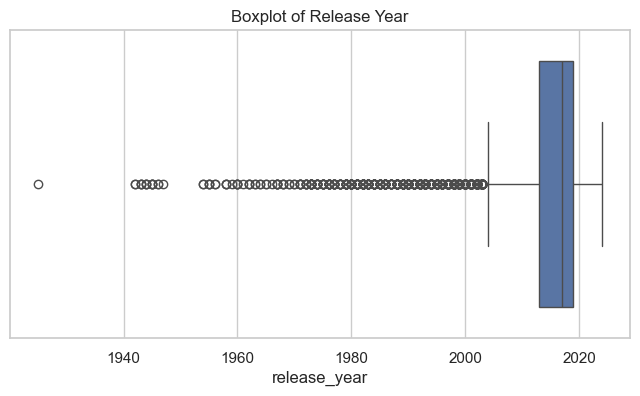

In [5]:
# Checking the outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['release_year'])
plt.title("Boxplot of Release Year")
plt.show()

# removing entries
df = df[df['release_year'] >= 1940]

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce') 
# strip -> removing space if exists 
# 'coerce' if exists invalid date -> NaT(Not a Time)

# Adding some features: year_added, month_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Flag column for Movie or TV
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0) # Movie = 1 & TV Show = 0

# duration -> (in minutes)
df['duration_int'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')


       show_id   type   title director     cast        country  \
count     8808   8808    8808     8808     8808           8808   
unique    8808      2    8805     4530     7695            748   
top      s8809  Movie  15-Aug  Unknown  Unknown  United States   
freq         1   6132       2     2633      824           3649   
mean       NaN    NaN     NaN      NaN      NaN            NaN   
min        NaN    NaN     NaN      NaN      NaN            NaN   
25%        NaN    NaN     NaN      NaN      NaN            NaN   
50%        NaN    NaN     NaN      NaN      NaN            NaN   
75%        NaN    NaN     NaN      NaN      NaN            NaN   
max        NaN    NaN     NaN      NaN      NaN            NaN   
std        NaN    NaN     NaN      NaN      NaN            NaN   

                           date_added  release_year rating  duration  \
count                            8808   8808.000000   8808      8808   
unique                            NaN           NaN     18     

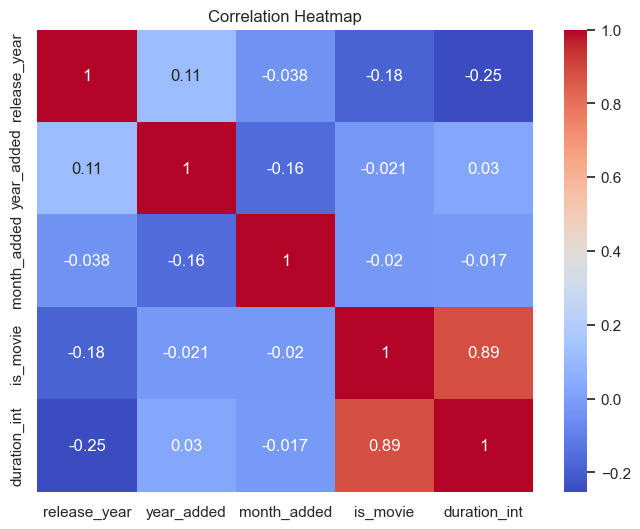

In [7]:
print(df.describe(include='all'))
print(df['type'].value_counts())
print(df['country'].value_counts().head(10))

# correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['release_year', 'year_added', 'month_added', 'is_movie', 'duration_int']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


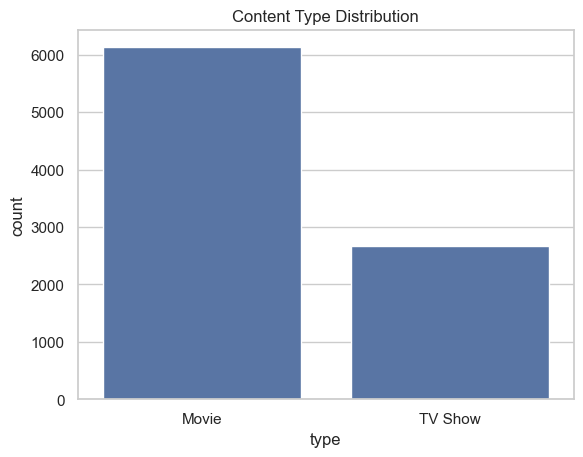

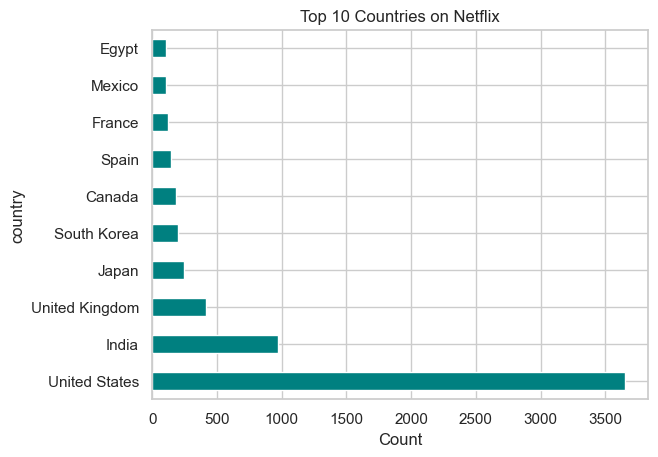

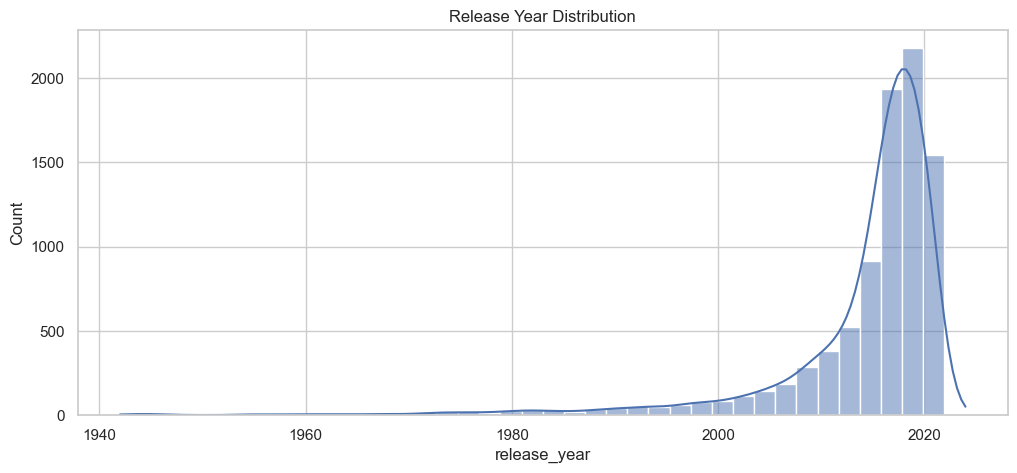

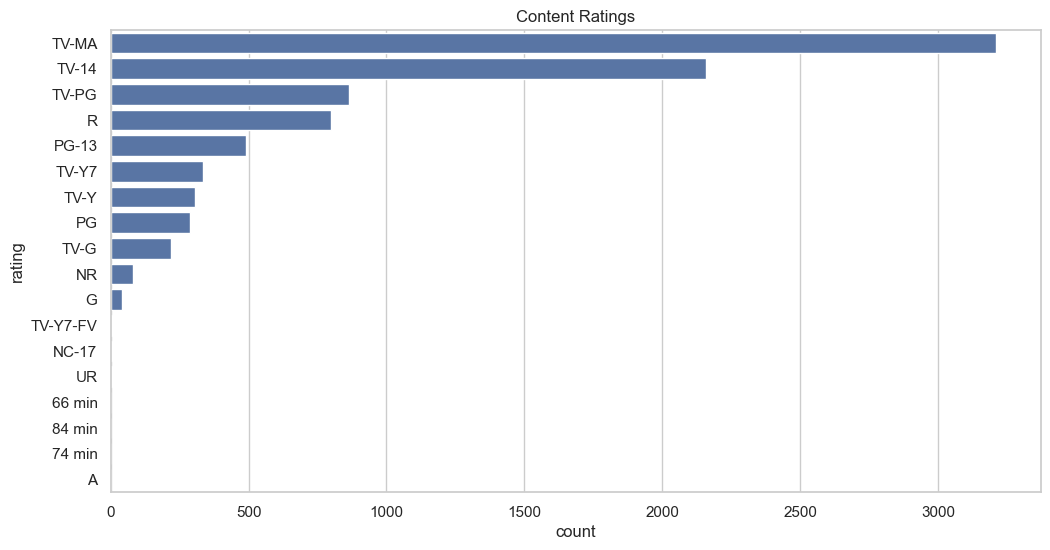

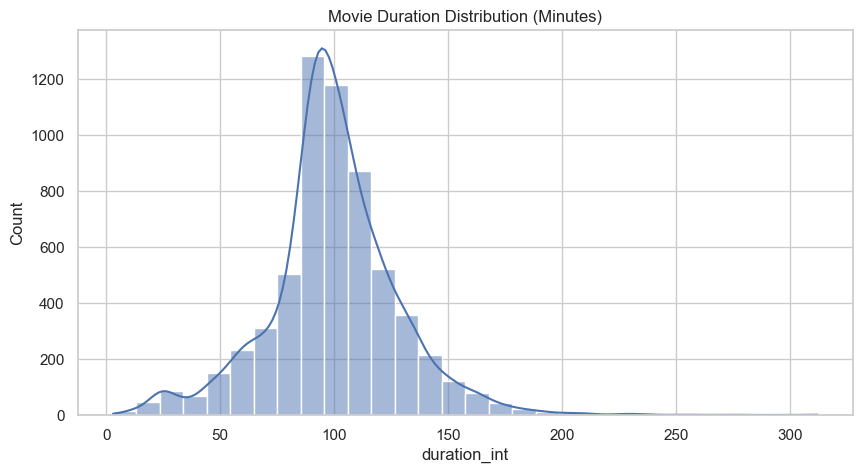

In [8]:
# Content type distribution
sns.countplot(data=df, x='type')
plt.title("Content Type Distribution")
plt.show()

# Top 10 countries
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='teal')
plt.title("Top 10 Countries on Netflix")
plt.xlabel("Count")
plt.show()

# Release year trend
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='release_year', bins=40, kde=True)
plt.title("Release Year Distribution")
plt.show()

# Ratings distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index)
plt.title("Content Ratings")
plt.show()

# Duration distribution for Movies
plt.figure(figsize=(10, 5))
sns.histplot(df[df['type'] == 'Movie']['duration_int'], bins=30, kde=True)
plt.title("Movie Duration Distribution (Minutes)")
plt.show()


C:\Users\Suleimenov\AppData\Local\Temp\ipykernel_16704\2390226258.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=content_by_month.index, y=content_by_month.values, palette='viridis')


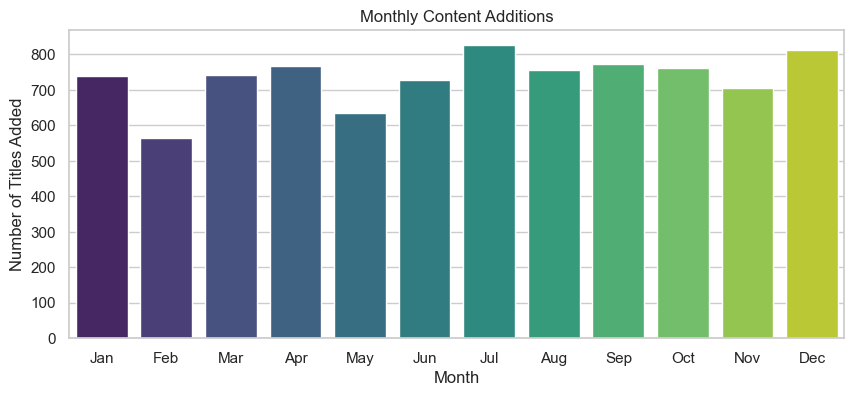

In [ ]:
# 1. When does Netflix add the most content? 
# When should Netflix plan promotions or releases?
# Plot content added by month to identify trends
content_by_month = df['month_added'].value_counts().sort_index()
plt.figure(figsize=(10, 4))
sns.barplot(x=content_by_month.index, y=content_by_month.values, palette='viridis')
plt.title("Monthly Content Additions")
plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.show()

# RECOMMENDATIONS:
# Netflix adds more content in July and October. # Summer break + Halloween and etc.
# These monts could be leveraged for marketing pushes, seasonal promotions , or special release campaigs.

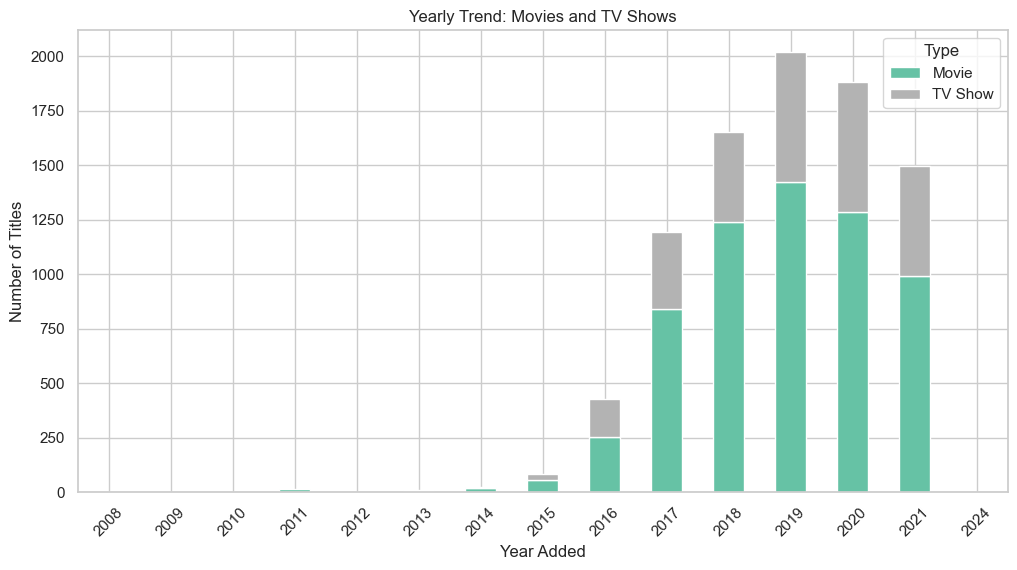

In [10]:
# 2. What content types are trending recently ?
# Helps with: Planning investments in shows vs movies
# Grouping by year and type
type_trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

type_trend.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Yearly Trend: Movies and TV Shows")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title="Type")
plt.show()

# RECOMMENTAIONS:
# There’s a noticeable increase in TV Shows over recent years. Because of the "bingable content" = EASY TO WATCH/EAT/DRINK
# Netflix should continue investing in serial content, especially for genres with high retention 
# like drama or crime series.

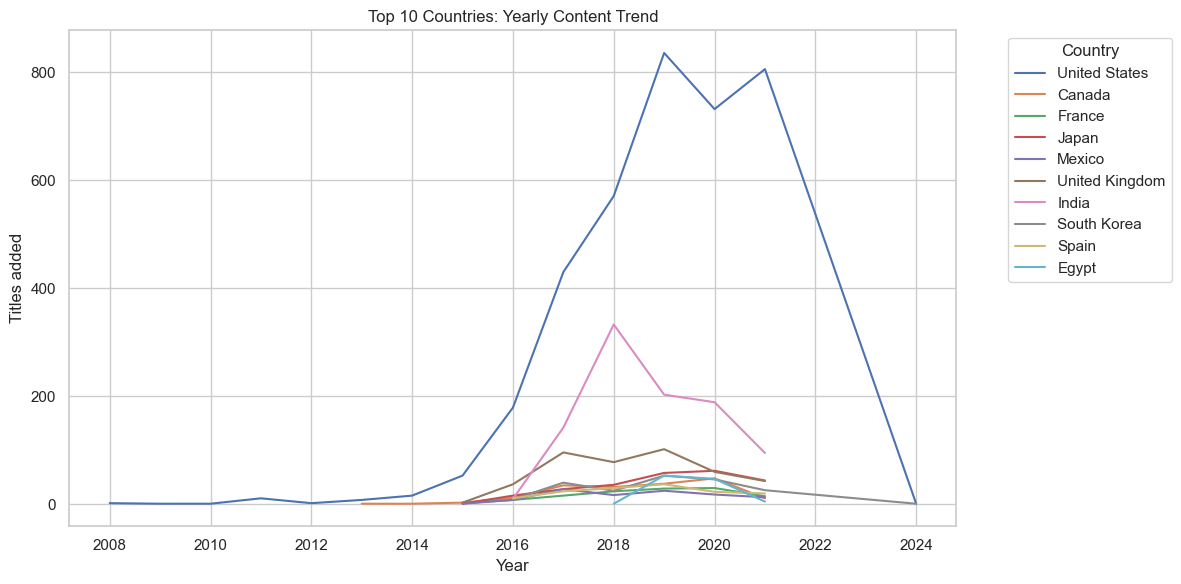

In [11]:
# 3. Which countries are underutilized but growing ? 
# Helps with: Diversifying production for global expansion
# Country + Year combo analysis
country_year = df.groupby(['year_added', 'country']).size().reset_index(name='count')
top_countries = df['country'].value_counts().head(10).index
filtered = country_year[country_year['country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x='year_added', y='count', hue='country')
plt.title("Top 10 Countries: Yearly Content Trend")
plt.ylabel("Titles added")
plt.xlabel("Year")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# RECOMMENDATIONS:
# While the US dominates, there’s consistent growth in India and UK. 
# Netflix should scale local productions and partner with creators in these countries.

C:\Users\Suleimenov\AppData\Local\Temp\ipykernel_17872\384142409.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='rocket')


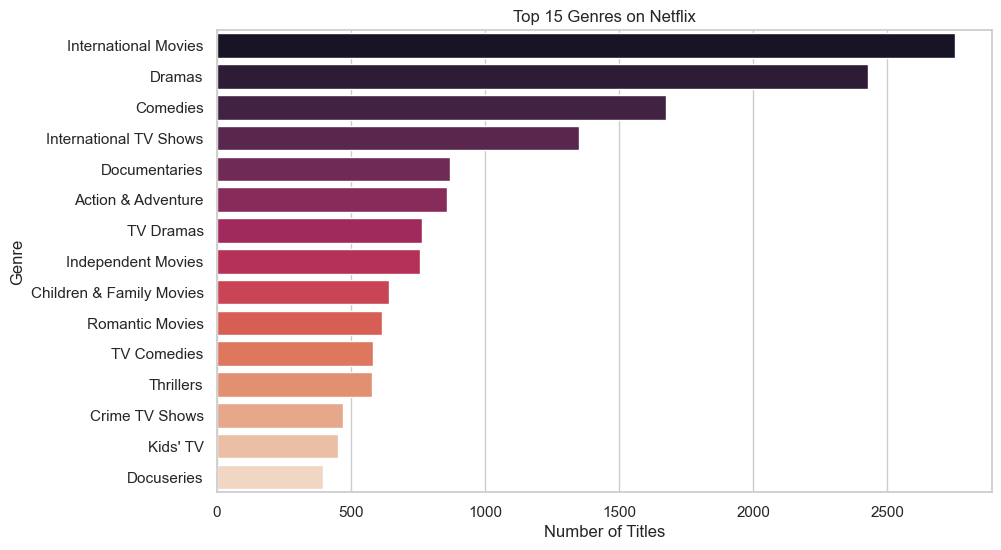

In [ ]:
# 4. Which genres are most popular ?
# Helps with: Content acquisition and targeted recommendations
# Explode genre tags
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)
genre_counts = genres.value_counts().head(15)

# Plot popular genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='rocket')
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

# RECOMMENDATIONS:
# Genres like International TV Shows, Dramas, and Comedies dominate. 
# Netflix should expand its regional drama and comedy offerings to strengthen engagement in diverse markets.

In [40]:
# Hypothetical: LTV = duration_in_months × revenue_per_content
# We'll simulate with how many months content stayed from release to now

from datetime import datetime

today = datetime.today()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['months_on_platform'] = ((today - df['date_added']).dt.days / 30).fillna(0)

# Assume LTV = months × 0.5
df['ltv'] = df['months_on_platform'] * 0.5

# Show top 10 highest LTV titles
df[['title', 'ltv']].sort_values(by='ltv', ascending=False).head(10)


,title,ltv
5957,To and From New York,105.250000
6611,Dinner for Five,104.683333
5956,Just Another Love Story,97.083333
5955,Splatter,93.800000
7370,Mad Ron's Prevues from Hell,88.000000
5954,Even the Rain,84.716667
5953,Joseph: King of Dreams,82.500000
5951,Unspeakable Acts,82.433333
5952,Victim of Beauty,82.433333
5947,Strange Voices,82.433333


In [41]:
import numpy as np

# Create random "active user rate" and "drop-off rate"
np.random.seed(42)
df['user_engagement_score'] = np.random.rand(len(df))

# Consider churn if engagement score < 0.3 (arbitrary threshold)
df['churned'] = df['user_engagement_score'] < 0.3
df['retained'] = ~df['churned']

# Retention rate
retention_rate = df['retained'].mean()
churn_rate = df['churned'].mean()

print(f"📉 Estimated Churn Rate: {churn_rate:.2%}")
print(f"📈 Estimated Retention Rate: {retention_rate:.2%}")


📉 Estimated Churn Rate: 30.73%
📈 Estimated Retention Rate: 69.27%


C:\Users\Suleimenov\AppData\Local\Temp\ipykernel_17872\1408024331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=retention_plot, x='type', y='retained', palette='crest')


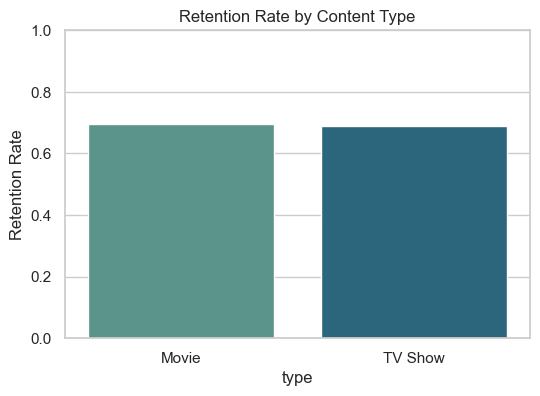

In [42]:
# Visualizing churn/retention by type
retention_plot = df.groupby('type')['retained'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=retention_plot, x='type', y='retained', palette='crest')
plt.title("Retention Rate by Content Type")
plt.ylabel("Retention Rate")
plt.ylim(0, 1)
plt.show()


In [43]:
# Descriptive stats for LTV and months on platform
df[['ltv', 'months_on_platform']].describe()


,ltv,months_on_platform
count,8808.000000,8808.000000
mean,36.016337,72.032675
std,9.482956,18.965911
min,6.266667,12.533333
25%,28.350000,56.700000
50%,35.266667,70.533333
75%,42.816667,85.633333
max,105.250000,210.500000


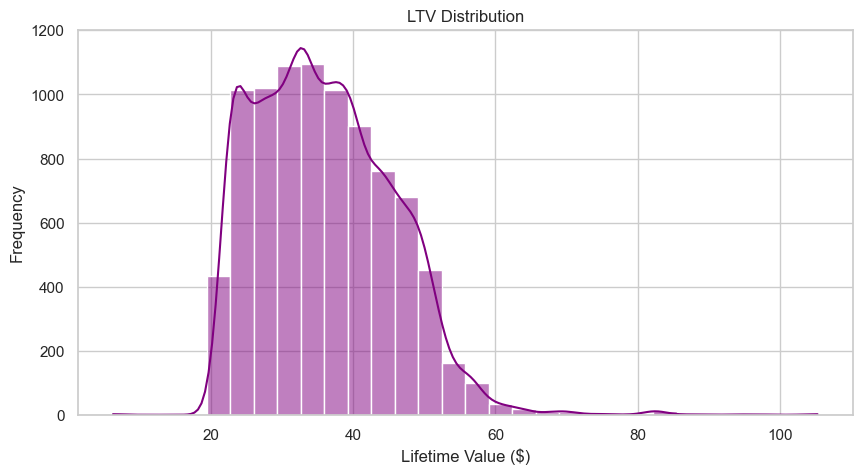

In [44]:
plt.figure(figsize=(10, 5))
sns.histplot(df['ltv'], bins=30, kde=True, color='purple')
plt.title("LTV Distribution")
plt.xlabel("Lifetime Value ($)")
plt.ylabel("Frequency")
plt.show()


In [1]:
from IPython.display import Markdown

Markdown("""
## 🎯 Final Thoughts & Business Impact

Netflix has a large, diverse library with strong global coverage and content variety. Based on this analysis, we recommend:

- 📆 **Launch Strategies**: Focus new releases and campaigns in **July/October** when content additions peak.
- 🎬 **Content Focus**: Invest further in **TV shows**, especially serial genres that retain viewers longer.
- 🌍 **Regional Growth**: Scale up content from growing regions like **India and the UK**.
- 🤝 **Partner Creators**: Collaborate with local creators to build **regionally resonant genres** like comedy and drama.
- 📈 **Data-Driven Planning**: Use genre and trend insights to inform **acquisition strategy** and **user segmentation**.

This EDA provides actionable insights that can guide both strategic content development and marketing efforts.
""")



## 🎯 Final Thoughts & Business Impact

Netflix has a large, diverse library with strong global coverage and content variety. Based on this analysis, we recommend:

- 📆 **Launch Strategies**: Focus new releases and campaigns in **July/October** when content additions peak.
- 🎬 **Content Focus**: Invest further in **TV shows**, especially serial genres that retain viewers longer.
- 🌍 **Regional Growth**: Scale up content from growing regions like **India and the UK**.
- 🤝 **Partner Creators**: Collaborate with local creators to build **regionally resonant genres** like comedy and drama.
- 📈 **Data-Driven Planning**: Use genre and trend insights to inform **acquisition strategy** and **user segmentation**.

This EDA provides actionable insights that can guide both strategic content development and marketing efforts.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных
top_ltv = df[['title', 'ltv']].sort_values(by='ltv', ascending=False).head(10)

# Установка стиля
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Горизонтальный bar chart
sns.barplot(data=top_ltv, x='ltv', y='title', palette='Blues_r')

# Заголовки
plt.title('Top 10 Titles by LTV (Lifetime Value)', fontsize=16)
plt.xlabel('LTV (months × 0.5)', fontsize=12)
plt.ylabel('Title', fontsize=12)

# Подписи значений
for i, (ltv, title) in enumerate(zip(top_ltv['ltv'], top_ltv['title'])):
    plt.text(ltv + 0.5, i, f'{ltv:.1f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()
